# Phase_2

### Import Libraries

In [45]:
import matplotlib.pyplot as plt
import sqlite3

### Connect to the SQLite database

In [46]:
connection = sqlite3.connect(r"D:\CIS4044-N-ICA\CIS4044-N-ICA\ICA\file.db.db")

 Define a function to calculate the average 7-day precipitation

In [47]:
def average_seven_day_precipitation(city_id, start_date):
    try:
        cursor = connection.cursor()
        query = "SELECT AVG(precipitation) FROM daily_weather_entries WHERE city_id = ? AND date BETWEEN ? AND ?"
        end_date = start_date[:4] + "-" + start_date[5:7] + "-" + str(int(start_date[8:10]) + 7)
        cursor.execute(query, (city_id, start_date, end_date))
        result = cursor.fetchone()
        return result[0] if result else None
    except sqlite3.OperationalError as ex:
        print(ex)
        return None

 Define a function to get the city name

In [48]:
def get_city_name(city_id):
    try:
        cursor = connection.cursor()
        query = "SELECT name FROM cities WHERE id = ?"
        cursor.execute(query, (city_id,))
        result = cursor.fetchone()
        return result[0] if result else None
    except sqlite3.OperationalError as ex:
        print(ex)
        return None

 Define a function to select all countries

In [49]:
def select_all_countries():
    try:
        cursor = connection.cursor()
        query = "SELECT * from countries"
        cursor.execute(query)
        return cursor.fetchall()
    except sqlite3.OperationalError as ex:
        print(ex)
        return None


 Define a function to calculate the average annual precipitation by city

In [50]:
def average_annual_precipitation_by_city(city_id, year):
    try:
        cursor = connection.cursor()
        query = """SELECT AVG(precipitation) FROM daily_weather_entries WHERE city_id = ? AND strftime('%Y', date) = ?"""
        cursor.execute(query, (city_id, year))
        result = cursor.fetchone()
        return result[0] if result and result[0] is not None else None
    except sqlite3.OperationalError as ex:
        print(ex)
        return None

 City IDs

In [51]:
city_ids = [1, 2, 3, 4, 5]

 Generate dates in 2020

In [52]:
start_dates = ["2020-01-01", "2020-02-01", "2020-03-01", "2020-04-01", "2020-05-01"]


 Initialize empty lists to store city names and precipitations

In [53]:
city_names = []
precipitations = []

 Iterate over city IDs and start dates

In [54]:
for city_id, start_date in zip(city_ids, start_dates):
    city_name = get_city_name(city_id)
    precipitation = average_seven_day_precipitation(city_id, start_date)
    if city_name and precipitation is not None:
        city_names.append(city_name)
        precipitations.append(precipitation)


 Create a bar chart for 7-day precipitation by city

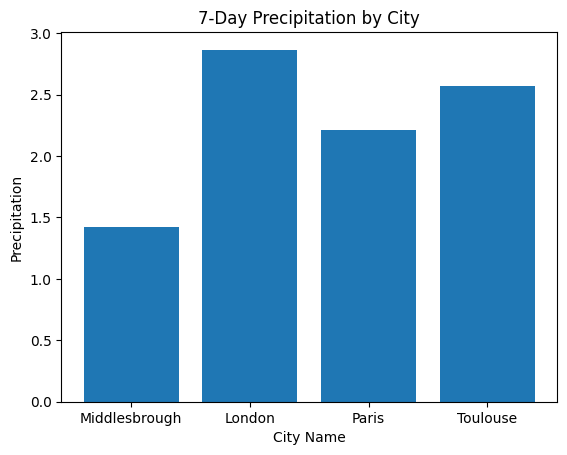

In [55]:
plt.bar(city_names, precipitations)
plt.xlabel('City Name')
plt.ylabel('Precipitation')
plt.title('7-Day Precipitation by City')
plt.show()

 Calculate average annual precipitation by country

In [56]:
year = "2020"
countries = select_all_countries()
country_names = []
precipitations = []

for country in countries:
    country_name = country[1]
    precipitation = average_annual_precipitation_by_city(1, year)
    if country_name and precipitation is not None:
        country_names.append(country_name)
        precipitations.append(precipitation)

 Create a bar chart for average annual precipitation by country

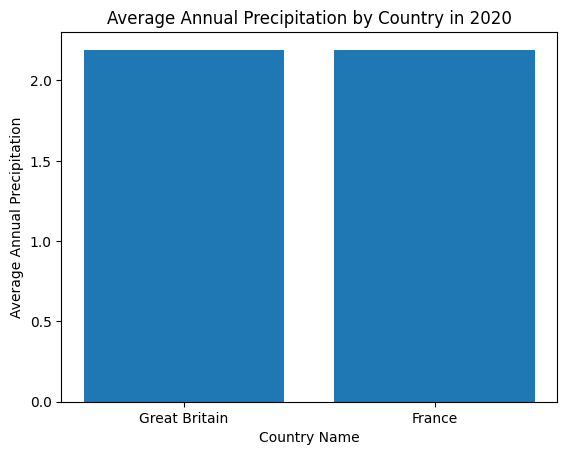

In [57]:
plt.bar(country_names, precipitations)
plt.xlabel('Country Name')
plt.ylabel('Average Annual Precipitation')
plt.title(f'Average Annual Precipitation by Country in {year}')
plt.show()

Get temperature and precipitation data for a city






In [58]:
def get_temperature_and_precipitation_values(connection, city_id):
    try:
        query = """ 
        SELECT MIN(mean_temp), MAX(mean_temp), AVG(mean_temp), 
        MIN(precipitation), MAX(precipitation), AVG(precipitation)
        FROM daily_weather_entries 
        WHERE city_id = ?
        """
        cursor = connection.cursor()
        cursor.execute(query, (city_id,))
        result = cursor.fetchone()
        
        return result if result else None
    
    except sqlite3.OperationalError as ex:
        print(ex)
        return None

Get the name of a city

In [59]:
def get_city_name(connection, city_id):
    try:
        query = "SELECT name FROM cities WHERE id = ?"
        cursor = connection.cursor()
        cursor.execute(query, (city_id,))
        result = cursor.fetchone()
        
        return result[0] if result else None
    
    except sqlite3.OperationalError as ex:
        print(ex)
        return None

Connect to the database 

In [60]:
connection = sqlite3.connect(r"D:\CIS4044-N-ICA\CIS4044-N-ICA\ICA\file.db.db")

List of city IDs

In [61]:
city_ids = [1, 2, 3, 4, 5]  

Empty lists to store city data

In [62]:
city_names = []
temperature_min_values = []
temperature_max_values = []
temperature_mean_values = []
precipitation_min_values = []
precipitation_max_values = []
precipitation_mean_values = []

Iterate over each city ID and retrieve its data

In [63]:
for city_id in city_ids:
    city_name = get_city_name(connection, city_id)
    values = get_temperature_and_precipitation_values(connection, city_id)
    
    if city_name and values:
        city_names.append(city_name)
        temperature_min_values.append(values[0])
        temperature_max_values.append(values[1])
        temperature_mean_values.append(values[2])
        precipitation_min_values.append(values[3])
        precipitation_max_values.append(values[4])
        precipitation_mean_values.append(values[5])

Create a grouped bar chart for temperature and precipitation values

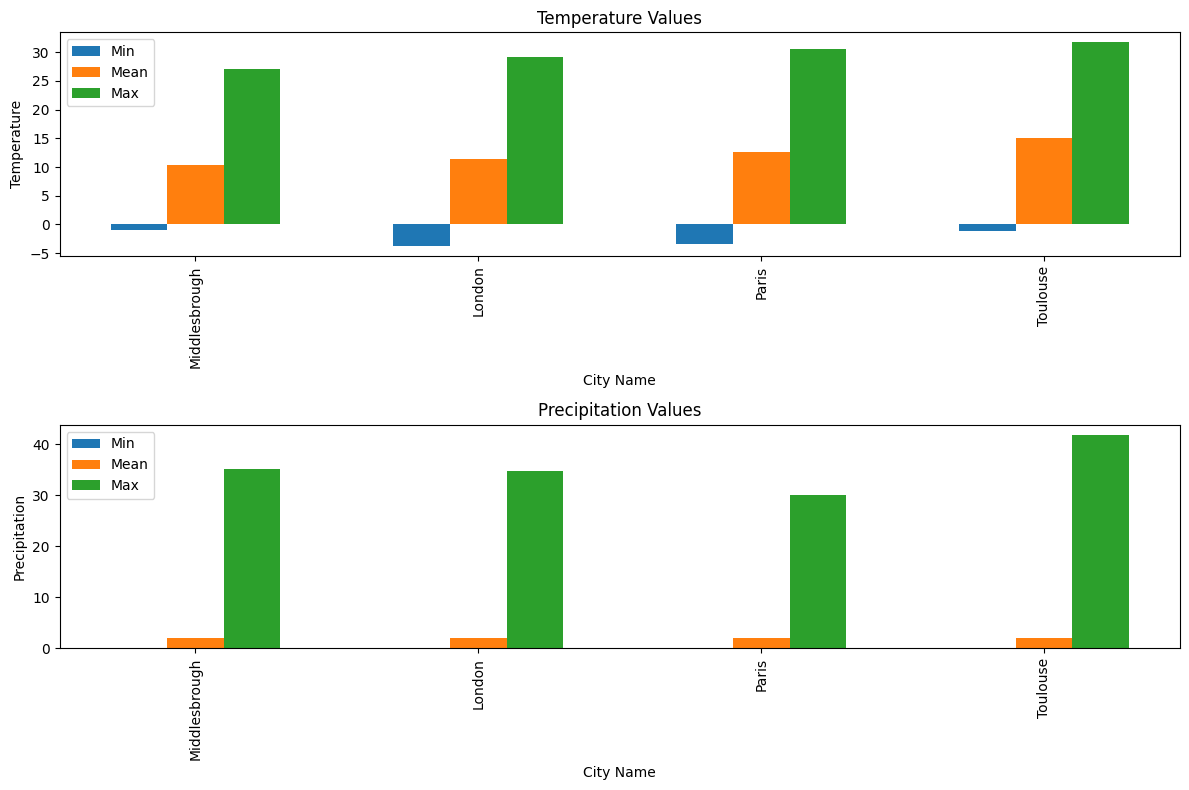

In [99]:
fig, ax = plt.subplots(2, figsize=(12, 8))
bar_width = 0.2
x = range(len(city_names))
ax[0].bar([i - bar_width for i in x], temperature_min_values, bar_width, label='Min')
ax[0].bar(x, temperature_mean_values, bar_width, label='Mean')
ax[0].bar([i + bar_width for i in x], temperature_max_values, bar_width, label='Max')
ax[0].set_title('Temperature Values')
ax[0].set_xlabel('City Name')
ax[0].set_ylabel('Temperature')
ax[0].set_xticks(x)
ax[0].set_xticklabels(city_names, rotation=90)
ax[0].legend()
ax[1].bar([i - bar_width for i in x], precipitation_min_values, bar_width, label='Min')
ax[1].bar(x, precipitation_mean_values, bar_width, label='Mean')
ax[1].bar([i + bar_width for i in x], precipitation_max_values, bar_width, label='Max')
ax[1].set_title('Precipitation Values')
ax[1].set_xlabel('City Name')
ax[1].set_ylabel('Precipitation')
ax[1].set_xticks(x)
ax[1].set_xticklabels(city_names, rotation=90)
ax[1].legend()

plt.tight_layout()
plt.show()


Get daily temperature values for a city

In [100]:
def get_daily_temperature_values(connection, city_id, date):
    try:
        query = """ 
            SELECT date, min_temp, max_temp 
            FROM daily_weather_entries 
            WHERE city_id = ? AND date LIKE ?
        """
        cursor = connection.cursor()
        cursor.execute(query, (city_id, f"{date}%"))
        results = cursor.fetchall()
        
        if results:
            dates = [result[0] for result in results]
            min_temperatures = [result[1] for result in results]
            max_temperatures = [result[2] for result in results]
            
            return dates, min_temperatures, max_temperatures
        else:
            return [], [], []
    
    except sqlite3.OperationalError as ex:
        print(ex)
        return [], [], []

Connect to the database

In [101]:
connection = sqlite3.connect(r"D:\CIS4044-N-ICA\CIS4044-N-ICA\ICA\file.db.db")

Set city ID and date

In [102]:
city_id = 1
date = "2022-01"


Get daily temperature values for the specified city and date

In [103]:
dates, min_temperatures, max_temperatures = get_daily_temperature_values(connection, city_id, date)

Create a line chart for min and max temperatures

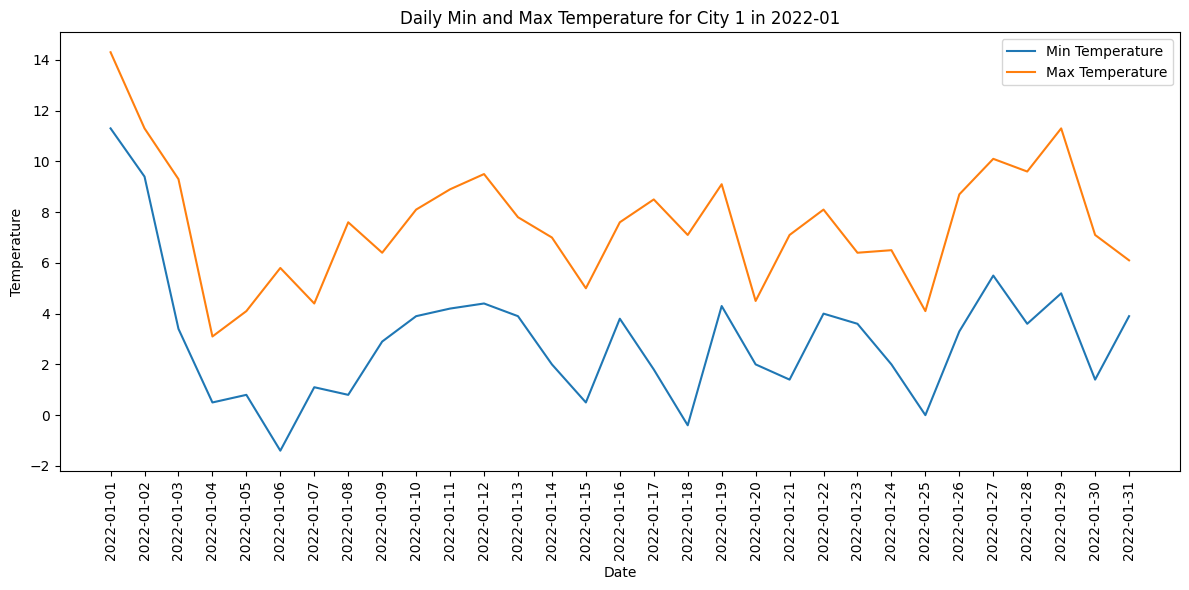

In [104]:
if dates and min_temperatures and max_temperatures:
    plt.figure(figsize=(12, 6))
    plt.plot(dates, min_temperatures, label='Min Temperature')
    plt.plot(dates, max_temperatures, label='Max Temperature')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.title(f'Daily Min and Max Temperature for City {city_id} in {date}')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("No data found for the specified city and date.")